# **TikTok Project**
**Course 5 - Regression Analysis: Simplify complex data relationships**

In [1]:
import numpy as np
import pandas as pd
import platform
import statsmodels
print('Python version: ', platform.python_version())
print('numpy version: ', np.__version__)
print('pandas version: ', pd.__version__)
print('statsmodels version: ', statsmodels.__version__)

Python version:  3.11.4
numpy version:  1.24.4
pandas version:  2.0.3
statsmodels version:  0.14.0


You are a data professional at TikTok. The data team is working towards building a machine learning model that can be used to determine whether a video contains a claim or whether it offers an opinion. With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.

The team is getting closer to completing the project, having completed an initial plan of action, initial Python coding work, EDA, and hypothesis testing.

The TikTok team has reviewed the results of the hypothesis testing. TikTok’s Operations Lead, Maika Abadi, is interested in how different variables are associated with whether a user is verified. Earlier, the data team observed that if a user is verified, they are much more likely to post opinions. Now, the data team has decided to explore how to predict verified status to help them understand how video characteristics relate to verified users. Therefore, you have been asked to conduct a logistic regression using verified status as the outcome variable. The results may be used to inform the final model related to predicting whether a video is a claim vs an opinion.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

# **Course 5 End-of-course project: Regression modeling**


In this activity, you will build a logistic regression model in Python. As you have learned, logistic regression helps you estimate the probability of an outcome. For data science professionals, this is a useful skill because it allows you to consider more than one variable against the variable you're measuring against. This opens the door for much more thorough and flexible analysis to be completed.

<br/>

**The purpose** of this project is to demostrate knowledge of EDA and regression models.

**The goal** is to build a logistic regression model and evaluate the model.
<br/>
*This activity has three parts:*

**Part 1:** EDA & Checking Model Assumptions
* What are some purposes of EDA before constructing a logistic regression model?

**Part 2:** Model Building and Evaluation
* What resources do you find yourself using as you complete this stage?

**Part 3:** Interpreting Model Results

* What key insights emerged from your model(s)?

* What business recommendations do you propose based on the models built?

Follow the instructions and answer the question below to complete the activity. Then, you will complete an executive summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.


# **Build a regression model**

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**

Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**
Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

### **Task 1. Imports and loading**
Import the data and packages that you've learned are needed for building regression models.

In [2]:
# Imports
# Packages for numerics + dataframes
import pandas as pd
import numpy as np

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for date conversions for calculating trip durations
from datetime import datetime
from datetime import date
from datetime import timedelta

# Packages for OLS, MLR, confusion matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics # For confusion matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Load the TikTok dataset.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# Load dataset into dataframe
data = pd.read_csv("tiktok_dataset.csv")

<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document to reflect on the Analyze stage.

In this stage, consider the following question where applicable to complete your code response:

* What are some purposes of EDA before constructing a logistic regression model?


==> ENTER YOUR RESPONSE HERE

### **Task 2a. Explore data with EDA**

Analyze the data and check for and handle missing values and duplicates.

Inspect the first five rows of the dataframe.

In [4]:
# Display first few rows
df = data
df.head()
### YOUR CODE HERE ###


,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Get the number of rows and columns in the dataset.

In [5]:
# Get number of rows and columns
df.shape
### YOUR CODE HERE ###


(19382, 12)

Get the data types of the columns.

In [6]:
# Get data types of columns
df.dtypes
### YOUR CODE HERE ###


#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

Get basic information about the dataset.

In [7]:
# Get basic information
df.info()
### YOUR CODE HERE ###


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Generate basic descriptive statistics about the dataset.

In [8]:
# Generate basic descriptive stats
df.describe().T
### YOUR CODE HERE ###


,count,mean,std,min,25%,50%,75%,max
#,19382.0,9.691500e+03,5.595246e+03,1.000000e+00,4.846250e+03,9.691500e+03,1.453675e+04,1.938200e+04
video_id,19382.0,5.627454e+09,2.536440e+09,1.234959e+09,3.430417e+09,5.618664e+09,7.843960e+09,9.999873e+09
video_duration_sec,19382.0,3.242173e+01,1.622997e+01,5.000000e+00,1.800000e+01,3.200000e+01,4.700000e+01,6.000000e+01
video_view_count,19084.0,2.547086e+05,3.228933e+05,2.000000e+01,4.942500e+03,9.954500e+03,5.043270e+05,9.998170e+05
video_like_count,19084.0,8.430464e+04,1.334205e+05,0.000000e+00,8.107500e+02,3.403500e+03,1.250200e+05,6.578300e+05
video_share_count,19084.0,1.673525e+04,3.203617e+04,0.000000e+00,1.150000e+02,7.170000e+02,1.822200e+04,2.561300e+05
video_download_count,19084.0,1.049430e+03,2.004300e+03,0.000000e+00,7.000000e+00,4.600000e+01,1.156250e+03,1.499400e+04
video_comment_count,19084.0,3.493121e+02,7.996389e+02,0.000000e+00,1.000000e+00,9.000000e+00,2.920000e+02,9.599000e+03


Check for and handle missing values.

In [9]:
# Check for missing values
df.isna().sum()
### YOUR CODE HERE ###

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [10]:
# Drop rows with missing values
df = df.dropna(axis = 0)
df.isna().sum()
### YOUR CODE HERE ###

#                           0
claim_status                0
video_id                    0
video_duration_sec          0
video_transcription_text    0
verified_status             0
author_ban_status           0
video_view_count            0
video_like_count            0
video_share_count           0
video_download_count        0
video_comment_count         0
dtype: int64

In [11]:
# Display first few rows after handling missing values
df.head()
### YOUR CODE HERE ###

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Check for and handle duplicates.

In [12]:
# Check for duplicates
df.duplicated().sum()
### YOUR CODE HERE ###

0

Check for and handle outliers.

<Axes: xlabel='video_duration_sec'>

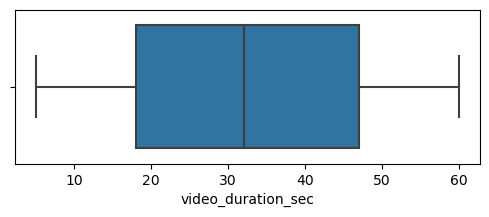

In [13]:
# Create a boxplot to visualize distribution of `video_duration_sec`
plt.figure(figsize = (6,2))
sns.boxplot(
    x = df['video_duration_sec']
)
### YOUR CODE HERE ###



<Axes: xlabel='video_view_count'>

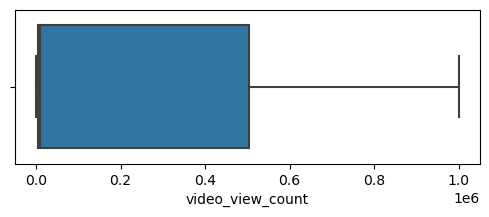

In [14]:
# Create a boxplot to visualize distribution of `video_view_count`
### YOUR CODE HERE ###
plt.figure(figsize = (6,2))
sns.boxplot(
    x = df['video_view_count']
)


<Axes: xlabel='video_like_count'>

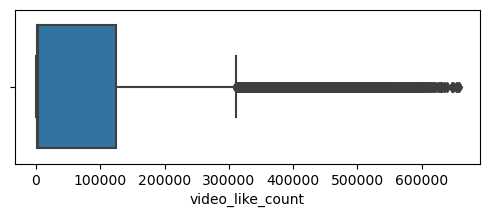

In [15]:
# Create a boxplot to visualize distribution of `video_like_count`
### YOUR CODE HERE ###
plt.figure(figsize = (6,2))
sns.boxplot(
    x = df['video_like_count']
)


<Axes: xlabel='video_comment_count'>

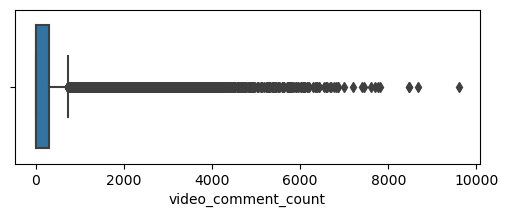

In [16]:
# Create a boxplot to visualize distribution of `video_comment_count`
### YOUR CODE HERE ###
plt.figure(figsize = (6,2))
sns.boxplot(
    x = df['video_comment_count']
)


In [17]:
# Check for and handle outliers for video_like_count
def outlier_imputer(column_list, iqr_factor):
    for col in column_list:
        # Reassign minimum to zero
        df.loc[df[col] < 0, col] = 0

        # Calculate upper threshold
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_threshold = q3 + (iqr_factor * iqr)
        print(col)
        print('q3:', q3)
        print('upper_threshold:', upper_threshold)

        # Reassign values > threshold to threshold
        df.loc[df[col] > upper_threshold, col] = upper_threshold
        print(df[col].describe())
        print()
### YOUR CODE HERE ###



In [18]:
# apply outlier_imputer iqr factor = 1.5
outlier_imputer(['video_comment_count'], 1.5)
outlier_imputer(['video_like_count'], 1.5)

video_comment_count
q3: 292.0
upper_threshold: 728.5
count    19084.000000
mean       181.023501
std        272.084766
min          0.000000
25%          1.000000
50%          9.000000
75%        292.000000
max        728.500000
Name: video_comment_count, dtype: float64

video_like_count
q3: 125020.0
upper_threshold: 311333.875
count     19084.000000
mean      74323.538632
std      107103.555220
min           0.000000
25%         810.750000
50%        3403.500000
75%      125020.000000
max      311333.875000
Name: video_like_count, dtype: float64



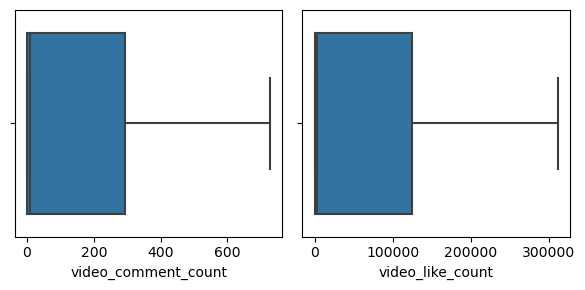

In [19]:
#recheck for validility
fig, axes = plt.subplots(1, 2, figsize = (6 , 3))
sns.boxplot(x = df['video_comment_count'], ax = axes[0])
sns.boxplot(x = df['video_like_count'], ax = axes[1])
plt.tight_layout()

Check class balance of the target variable. Remember, the goal is to predict whether the user of a given post is verified or unverified.

In [20]:
# Check class balance
df_status_count = df['verified_status'].value_counts(normalize = True)
### YOUR CODE HERE ###
df_status_count

verified_status
not verified    0.93712
verified        0.06288
Name: proportion, dtype: float64

Approximately 94.2% of the dataset represents videos posted by unverified accounts and 5.8% represents videos posted by verified accounts. So the outcome variable is not very balanced.

Use resampling to create class balance in the outcome variable, if needed.

In [21]:
# Use resampling to create class balance in the outcome variable, if needed

# Identify data points from majority and minority classes
majority = df[df['verified_status'] == 'not verified']
minority = df[df['verified_status'] == 'verified']
### YOUR CODE HERE ###

# Upsample the minority class (which is "verified")
minority_upsample = resample(
    minority,
    replace = True,
    n_samples = len(majority),
    random_state = 0
)
### YOUR CODE HERE ###

# Combine majority class with upsampled minority class
data_upsample = pd.concat([majority, minority_upsample]).reset_index(drop = True)
### YOUR CODE HERE ###

# Display new class counts
data_upsample['verified_status'].value_counts()
data_upsample.info()
### YOUR CODE HERE ###

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35768 entries, 0 to 35767
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         35768 non-null  int64  
 1   claim_status              35768 non-null  object 
 2   video_id                  35768 non-null  int64  
 3   video_duration_sec        35768 non-null  int64  
 4   video_transcription_text  35768 non-null  object 
 5   verified_status           35768 non-null  object 
 6   author_ban_status         35768 non-null  object 
 7   video_view_count          35768 non-null  float64
 8   video_like_count          35768 non-null  float64
 9   video_share_count         35768 non-null  float64
 10  video_download_count      35768 non-null  float64
 11  video_comment_count       35768 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 3.3+ MB


Get the average `video_transcription_text` length for videos posted by verified accounts and the average `video_transcription_text` length for videos posted by unverified accounts.



In [22]:
# Get the average `video_transcription_text` length for claims and the average `video_transcription_text` length for opinions
data_upsample['length_transcription'] = data_upsample['video_transcription_text'].apply(len)
### YOUR CODE HERE ###
upsample_group = data_upsample.groupby('verified_status')
print(f"verified = {np.mean(upsample_group.get_group('verified')['length_transcription'])}")
print(f"not verified = {np.mean(upsample_group.get_group('not verified')['length_transcription'])}")

verified = 84.56955938268844
not verified = 89.40114068441065


Extract the length of each `video_transcription_text` and add this as a column to the dataframe, so that it can be used as a potential feature in the model.

In [23]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
data_upsample['length_transcription']
### YOUR CODE HERE ###


0         97
1        107
2        137
3        131
4        128
        ... 
35763     75
35764     76
35765     90
35766     73
35767     60
Name: length_transcription, Length: 35768, dtype: int64

In [24]:
# Display first few rows of dataframe after adding new column
data_upsample.head()
### YOUR CODE HERE ###


,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,length_transcription
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts.

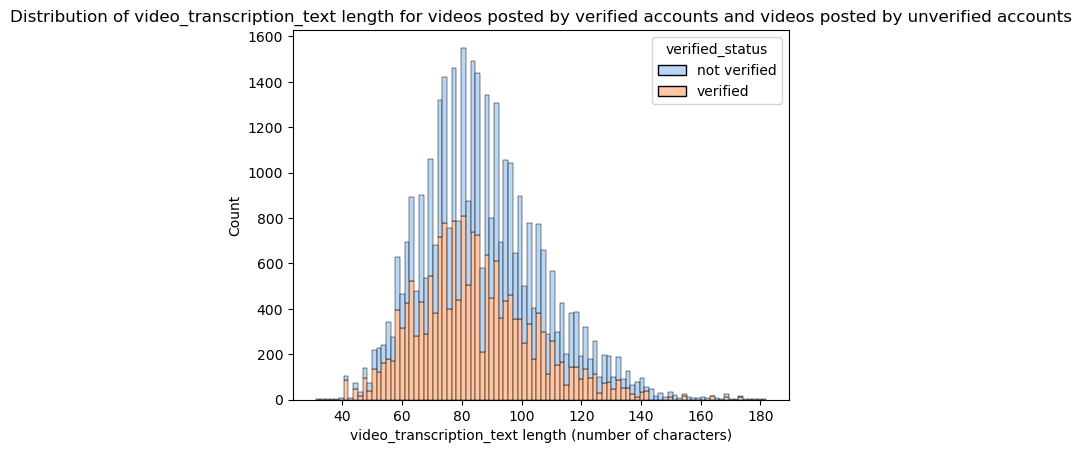

<Figure size 640x480 with 0 Axes>

In [25]:
# Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts
# Create two histograms in one plot
### YOUR CODE HERE ###
sns.histplot(data=data_upsample, 
             stat='count', 
             multiple="stack", 
             x='length_transcription', 
             kde=False, 
             palette="pastel", 
             hue="verified_status",
             element="bars", 
             legend=True
)
plt.title("Seaborn Stacked Histogram")
plt.xlabel("video_transcription_text length (number of characters)")
plt.ylabel("Count")
plt.title("Distribution of video_transcription_text length for videos posted by verified accounts and videos posted by unverified accounts")
plt.show()

plt.tight_layout()

### **Task 2b. Examine correlations**

Next, code a correlation matrix to help determine most correlated variables.

In [26]:
# Code a correlation matrix to help determine most correlated variables
data_upsample.corr(numeric_only=True)
### YOUR CODE HERE ###


,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,length_transcription
#,1.000000,-0.000853,-0.011729,-0.697007,-0.626385,-0.504015,-0.487096,-0.608773,-0.193677
video_id,-0.000853,1.000000,0.011859,0.002554,0.005993,0.010515,0.008753,0.012674,-0.007083
video_duration_sec,-0.011729,0.011859,1.000000,0.013589,0.004494,0.002206,0.003989,-0.001086,-0.002981
video_view_count,-0.697007,0.002554,0.013589,1.000000,0.856937,0.711313,0.690048,0.748361,0.244693
video_like_count,-0.626385,0.005993,0.004494,0.856937,1.000000,0.832146,0.805543,0.818032,0.216693
video_share_count,-0.504015,0.010515,0.002206,0.711313,0.832146,1.000000,0.710117,0.671335,0.171651
video_download_count,-0.487096,0.008753,0.003989,0.690048,0.805543,0.710117,1.000000,0.793668,0.173396
video_comment_count,-0.608773,0.012674,-0.001086,0.748361,0.818032,0.671335,0.793668,1.000000,0.217661
length_transcription,-0.193677,-0.007083,-0.002981,0.244693,0.216693,0.171651,0.173396,0.217661,1.000000


Visualize a correlation heatmap of the data.

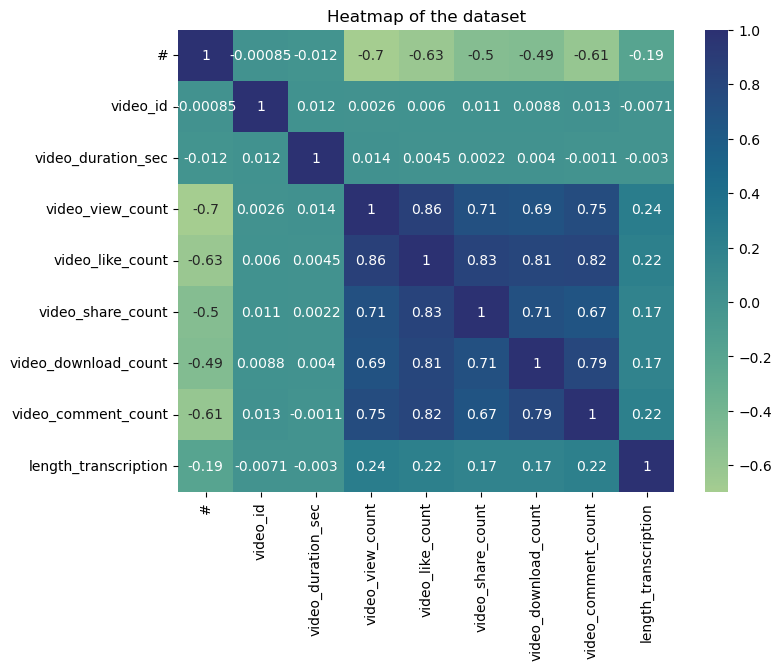

In [27]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(8, 6))
sns.heatmap(
    data_upsample.corr(numeric_only=True), 
    annot=True, 
    cmap="crest")
plt.title("Heatmap of the dataset")
plt.show()
### YOUR CODE HERE ###


One of the model assumptions for logistic regression is no severe multicollinearity among the features. Take this into consideration as you examine the heatmap and choose which features to proceed with.

**Question:** What variables are shown to be correlated in the heatmap?

<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**

After analysis and deriving variables with close relationships, it is time to begin constructing the model. Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3a. Select variables**

Set your Y and X variables.

Select the outcome variable.

In [28]:
# Select outcome variable
y = data_upsample['verified_status']
### YOUR CODE HERE ###


Select the features.

In [29]:
# Select features
X = data_upsample[["video_duration_sec", "claim_status", "author_ban_status",
                   "video_view_count", "video_share_count", "video_download_count", 
                   "video_comment_count"]]
### YOUR CODE HERE ###


# Display first few rows of features dataframe
X.head()
### YOUR CODE HERE ###


,video_duration_sec,claim_status,author_ban_status,video_view_count,video_share_count,video_download_count,video_comment_count
0,59,claim,under review,343296.0,241.0,1.0,0.0
1,32,claim,active,140877.0,19034.0,1161.0,684.0
2,31,claim,active,902185.0,2858.0,833.0,329.0
3,25,claim,active,437506.0,34812.0,1234.0,584.0
4,19,claim,active,56167.0,4110.0,547.0,152.0


### **Task 3b. Train-test split**

Split the data into training and testing sets.

In [30]:
# Split the data into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
### YOUR CODE HERE ###


Confirm that the dimensions of the training and testing sets are in alignment.

In [31]:
# Get shape of each training and testing set
X_train.shape, X_test.shape, y_train.shape, y_test.shape
### YOUR CODE HERE ###


((25037, 7), (10731, 7), (25037,), (10731,))

### **Task 3c. Encode variables**

Check the data types of the features.

In [32]:
# Check data types
X_train.dtypes
### YOUR CODE HERE ###


video_duration_sec        int64
claim_status             object
author_ban_status        object
video_view_count        float64
video_share_count       float64
video_download_count    float64
video_comment_count     float64
dtype: object

In [33]:
# Get unique values in `claim_status`
X_train['claim_status'].unique()
### YOUR CODE HERE ###



array(['claim', 'opinion'], dtype=object)

In [34]:
# Get unique values in `author_ban_status`
X_train['author_ban_status'].unique()
### YOUR CODE HERE ###


array(['active', 'under review', 'banned'], dtype=object)

As shown above, the `claim_status` and `author_ban_status` features are each of data type `object` currently. In order to work with the implementations of models through `sklearn`, these categorical features will need to be made numeric. One way to do this is through one-hot encoding.

Encode categorical features in the training set using an appropriate method.

In [61]:
# Select the training features that needs to be encoded
X__train_encode = X_train[['claim_status','author_ban_status']]
### YOUR CODE HERE ###


# Display first few rows
X__train_encode.head()
### YOUR CODE HERE ###


,claim_status,author_ban_status
32925,claim,active
4266,claim,active
24979,opinion,active
24074,opinion,active
32056,opinion,active


In [36]:
# Set up an encoder for one-hot encoding the categorical features
X_encoder = OneHotEncoder(drop = 'first', sparse_output = False)
### YOUR CODE HERE ###


In [37]:
# Fit and transform the training features using the encoder
X_train_encoded = X_encoder.fit_transform(X__train_encode)
### YOUR CODE HERE ###


In [87]:
# Get feature names from encoder
X_encoder.get_feature_names_out()
### YOUR CODE HERE ###


array(['claim_status_opinion', 'author_ban_status_banned',
       'author_ban_status_under review'], dtype=object)

In [39]:
# Display first few rows of encoded training features
X_train_encoded
### YOUR CODE HERE ###


array([[0., 0., 0.],
       [0., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [63]:
# Place encoded training features (which is currently an array) into a dataframe
X_train_encoded_df = pd.DataFrame(data=X_train_encoded, columns=X_encoder.get_feature_names_out())
### YOUR CODE HERE ###


# Display first few rows
X_train_encoded_df
### YOUR CODE HERE ###


,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
25032,1.0,0.0,0.0
25033,1.0,0.0,0.0
25034,1.0,0.0,0.0
25035,1.0,0.0,0.0


In [64]:
# Display first few rows of `X_train` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
X_train.drop(columns=["claim_status", "author_ban_status"]).head()
### YOUR CODE HERE ###


,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count
32925,52,599928.0,13752.0,3211.0,728.5
4266,25,623816.0,59817.0,4177.0,728.5
24979,44,6575.0,9.0,0.0,0.0
24074,30,389.0,40.0,3.0,1.0
32056,9,4244.0,94.0,40.0,14.0


In [66]:
# Concatenate `X_train` and `X_train_encoded_df` to form the final dataframe for training data (`X_train_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_train after dropping `claim_status` and `author_ban_status`,
# so that the indices align with those in `X_train_encoded_df` and `count_df`
### YOUR CODE HERE ###
X_train_final = pd.concat([X_train.drop(columns=["claim_status", "author_ban_status"]).reset_index(drop=True), X_train_encoded_df], axis=1)


# Display first few rows
X_train_final.head()
### YOUR CODE HERE ###


,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,52,599928.0,13752.0,3211.0,728.5,0.0,0.0,0.0
1,25,623816.0,59817.0,4177.0,728.5,0.0,0.0,0.0
2,44,6575.0,9.0,0.0,0.0,1.0,0.0,0.0
3,30,389.0,40.0,3.0,1.0,1.0,0.0,0.0
4,9,4244.0,94.0,40.0,14.0,1.0,0.0,0.0


Check the data type of the outcome variable.

In [69]:
# Check data type of outcome variable
X_train_final.dtypes
### YOUR CODE HERE ###


video_duration_sec                  int64
video_view_count                  float64
video_share_count                 float64
video_download_count              float64
video_comment_count               float64
claim_status_opinion              float64
author_ban_status_banned          float64
author_ban_status_under review    float64
dtype: object

In [74]:
# Get unique values of outcome variable
y_train.dtypes
y_train.unique()
### YOUR CODE HERE ###


array(['verified', 'not verified'], dtype=object)

A shown above, the outcome variable is of data type `object` currently. One-hot encoding can be used to make this variable numeric.

Encode categorical values of the outcome variable the training set using an appropriate method.

In [99]:
# Set up an encoder for one-hot encoding the categorical outcome variable
y_encoder = OneHotEncoder(drop = 'first', sparse_output = False)
### YOUR CODE HERE ###


In [79]:
# Encode the training outcome variable
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1)).ravel()
# Notes:
#   - Adjusting the shape of `y_train` before passing into `.fit_transform()`, since it takes in 2D array
#   - Using `.ravel()` to flatten the array returned by `.fit_transform()`, so that it can be used later to train the model
### YOUR CODE HERE ###

# Display the encoded training outcome variable
y_train_encoded
### YOUR CODE HERE ###


array([1., 0., 1., ..., 1., 1., 0.])

### **Task 3d. Model building**

Construct a model and fit it to the training set.

In [80]:
# Construct a logistic regression model and fit it to the training set
LS_model = LogisticRegression(random_state = 0, max_iter = 800).fit(X_train_final, y_train_encoded)
### YOUR CODE HERE ###



<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Taks 4a. Results and evaluation**

Evaluate your model.

Encode categorical features in the testing set using an appropriate method.

In [82]:
# Select the testing features that needs to be encoded
X_test_to_encode = X_test[["claim_status", "author_ban_status"]]
### YOUR CODE HERE ###


# Display first few rows
X_test_to_encode.head()
### YOUR CODE HERE ###


,claim_status,author_ban_status
21061,opinion,active
31748,opinion,active
20197,claim,active
5727,claim,active
11607,opinion,active


In [85]:
# Transform the testing features using the encoder
X_test_encoded = encoder.fit_transform(X_test_to_encode)
### YOUR CODE HERE ###


# Display first few rows of encoded testing features
X_test_encoded
### YOUR CODE HERE ###


array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [90]:
# Place encoded testing features (which is currently an array) into a dataframe
X_test_encoded_df = pd.DataFrame(data = X_test_encoded, columns = X_encoder.get_feature_names_out())
### YOUR CODE HERE ###


# Display first few rows
X_test_encoded_df
### YOUR CODE HERE ###


,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
10726,1.0,0.0,0.0
10727,1.0,0.0,1.0
10728,1.0,0.0,0.0
10729,1.0,0.0,0.0


In [92]:
# Display first few rows of `X_test` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
X_test_drop = X_test.drop(columns = ['claim_status', 'author_ban_status'])
### YOUR CODE HERE ###
X_test_drop.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count
21061,41,2118.0,57.0,5.0,2.0
31748,27,5701.0,157.0,1.0,0.0
20197,31,449767.0,75385.0,5956.0,728.5
5727,19,792813.0,56597.0,5146.0,728.5
11607,54,2044.0,68.0,19.0,2.0


In [94]:
# Concatenate `X_test` and `X_test_encoded_df` to form the final dataframe for training data (`X_test_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_test after dropping `claim_status`, and `author_ban_status`,
# so that the indices align with those in `X_test_encoded_df` and `test_count_df`
### YOUR CODE HERE ###
X_test_final = pd.concat([X_test_drop.reset_index(drop = True), X_test_encoded_df], axis = 1)

# Display first few rows
X_test_final
### YOUR CODE HERE ###


,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,41,2118.0,57.0,5.0,2.0,1.0,0.0,0.0
1,27,5701.0,157.0,1.0,0.0,1.0,0.0,0.0
2,31,449767.0,75385.0,5956.0,728.5,0.0,0.0,0.0
3,19,792813.0,56597.0,5146.0,728.5,0.0,0.0,0.0
4,54,2044.0,68.0,19.0,2.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
10726,36,4567.0,305.0,10.0,1.0,1.0,0.0,0.0
10727,8,2925.0,400.0,3.0,1.0,1.0,0.0,1.0
10728,43,173.0,1.0,0.0,0.0,1.0,0.0,0.0
10729,38,4617.0,187.0,12.0,1.0,1.0,0.0,0.0


Test the logistic regression model. Use the model to make predictions on the encoded testing set.

In [95]:
# Use the logistic regression model to get predictions on the encoded testing set
y_pred = LS_model.predict(X_test_final)
### YOUR CODE HERE ###


Display the predictions on the encoded testing set.

In [96]:
# Display the predictions on the encoded testing set
y_pred
### YOUR CODE HERE ###


array([1., 1., 0., ..., 1., 1., 1.])

Display the true labels of the testing set.

In [97]:
# Display the true labels of the testing set
y_test
### YOUR CODE HERE ###


21061        verified
31748        verified
20197        verified
5727     not verified
11607    not verified
             ...     
14615    not verified
11828    not verified
17480    not verified
22737        verified
22849        verified
Name: verified_status, Length: 10731, dtype: object

Encode the true labels of the testing set so it can be compared to the predictions.

In [102]:
# Encode the testing outcome variable
# Notes:
#   - Adjusting the shape of `y_test` before passing into `.transform()`, since it takes in 2D array
#   - Using `.ravel()` to flatten the array returned by `.transform()`, so that it can be used later to compare with predictions
### YOUR CODE HERE ###
y_test_encode = y_encoder.fit_transform(y_test.values.reshape(-1,1)).ravel()

# Display the encoded testing outcome variable
y_test_encode

array([1., 1., 1., ..., 0., 1., 1.])

Confirm again that the dimensions of the training and testing sets are in alignment since additional features were added.

In [103]:
# Get shape of each training and testing set
y_test_encode.shape, y_pred.shape
### YOUR CODE HERE ###


((10731,), (10731,))

### **Task 4b. Visualize model results**

Create a confusion matrix to visualize the results of the logistic regression model.

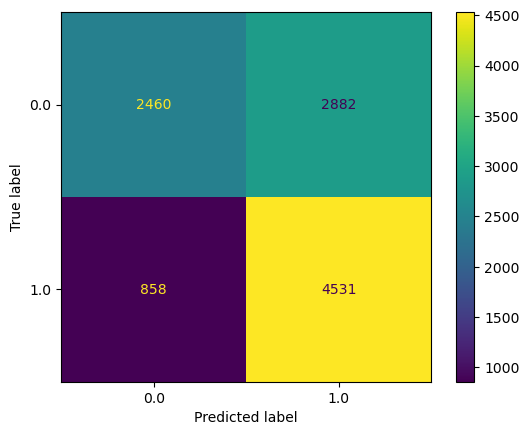

In [107]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test_encode, y_pred, labels=LS_model.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=LS_model.classes_)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.show()

Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the logistic regression model.

In [109]:
# Create a classification report
(4531+2460) / (4531+2460+2882+858)
### YOUR CODE HERE ###


0.6514770291678316

### **Task 4c. Interpret model coefficients**

In [111]:
# Get the feature names from the model and the model coefficients (which represent log-odds ratios)
target_labels = ["verified", "not verified"]
print(classification_report(y_test_encode, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

    verified       0.74      0.46      0.57      5342
not verified       0.61      0.84      0.71      5389

    accuracy                           0.65     10731
   macro avg       0.68      0.65      0.64     10731
weighted avg       0.68      0.65      0.64     10731



### **Task 4d. Conclusion**

1. What are the key takeaways from this project?

2. What results can be presented from this project?

==> ENTER YOUR RESPONSE TO QUESTIONS 1 AND 2 HERE

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged. 